In [1]:
import pandas as pd
from scipy.io import arff

In [ ]:
def load_single_data_file(subject_id, device, sensor):
    data, _ = arff.loadarff(f'../dataset/{device}_arff/{sensor}/data_{subject_id}_{sensor}_{device}.arff')
    df = pd.DataFrame(data)
    df.columns = df.columns.str.strip('"')
    df.columns = map(lambda column_name: sensor.upper() + "_" + column_name if column_name[0] in ["X", "Y", "Z", "R"] else column_name, df.columns)
    df['ACTIVITY'] = df['ACTIVITY'].str.decode('utf-8')
    df['class'] = df['class'].str.decode('utf-8')
    return df

df = load_single_data_file('1600', 'watch', 'gyro')
df.head()

ACTIVITY  GYRO_X0  GYRO_X1  GYRO_X2  GYRO_X3  GYRO_X4  GYRO_X5  GYRO_X6  \
0        A    0.075    0.415    0.445    0.060    0.005    0.000      0.0   
1        A    0.085    0.335    0.490    0.080    0.005    0.000      0.0   
2        A    0.055    0.490    0.355    0.095    0.000    0.005      0.0   
3        A    0.055    0.500    0.340    0.085    0.020    0.000      0.0   
4        A    0.025    0.475    0.455    0.045    0.000    0.000      0.0   

   GYRO_X7  GYRO_X8  ...  GYRO_ZMFCC11  GYRO_ZMFCC12  GYRO_XYCOS  GYRO_XZCOS  \
0    0.000      0.0  ...      0.456107      0.450246    0.137651    0.235345   
1    0.005      0.0  ...      0.465964      0.459977   -0.047322    0.278694   
2    0.000      0.0  ...      0.436792      0.431179    0.276071    0.417038   
3    0.000      0.0  ...      0.426576      0.421094    0.282766    0.397700   
4    0.000      0.0  ...      0.417362      0.411999    0.330998    0.404267   

   GYRO_YZCOS  GYRO_XYCOR  GYRO_XZCOR  GYRO_YZCOR  GYRO_RESULTANT  class  
0    0.766546    0.136262    0.235501    0.766845         4.04589   1600  
1    0.245712   -0.046939    0.278224    0.245890         4.02048   1600  
2    0.484973    0.276789    0.417461    0.484790         3.78650   1600  
3    0.660787    0.287947    0.398490    0.662386         3.77595   1600  
4    0.870224    0.330725    0.404739    0.873363         3.54575   1600  

[5 rows x 93 columns]

In [3]:
import glob
import os

all_files = sorted(glob.glob('../dataset/*/accel/*.arff'))

data = []

for file in all_files:
    filename = os.path.basename(file)
    _, subject_id, _ , device = filename.replace('.arff', '').split('_')
    df_accel = load_single_data_file(subject_id, device, 'accel')
    df_gyro = load_single_data_file(subject_id, device, 'gyro')

    common_columns = ['ACTIVITY', 'class']

    df_accel_common = df_accel[common_columns]
    df_gyro_common = df_gyro[common_columns]

    max_matching_prefix = df_accel_common.eq(df_gyro_common).all(axis=1).idxmin()
    print(max_matching_prefix)

    df_accel = df_accel.iloc[:max_matching_prefix]
    df_gyro = df_gyro.iloc[:max_matching_prefix]

    assert df_accel[common_columns].equals(df_gyro[common_columns])

    common_df = df_accel[common_columns]
    df_accel = df_accel.iloc[:max_matching_prefix]
    df_gyro = df_gyro.iloc[:max_matching_prefix]

    df = pd.concat(
        [
            common_df,
            df_accel.drop(columns=common_columns),
            df_gyro.drop(columns=common_columns)
        ],
        axis=1
    )

    assert df.isna().sum().sum() == 0

    data.append(df)

data = pd.concat(data, axis=0)

data.shape

124
202
124
90
124
360
124
0
17
124
35
0
0
0
0
0
0
124
270
71
67
124
89
124
17
60
17
17
124
124
124
124
17
124
17
124
215
17
0
17
22
22
22
22
22
22
270
22
180
22
0
0
0
0
0
0
0
220
0
0
0
0
0
17
0
0
316
0
17
0
17
0
71
309
0
0
0
0
0
0
0
0
0
0
0
0
22
22
22
22
161
17
197
17
17
17
0
17
0
0


(5455, 184)

In [4]:
data.head()

ACTIVITY class  ACCEL_X0  ACCEL_X1  ACCEL_X2  ACCEL_X3  ACCEL_X4  ACCEL_X5  \
0        A  1600     0.235     0.470     0.275     0.020     0.000       0.0   
1        A  1600     0.275     0.440     0.270     0.015     0.000       0.0   
2        A  1600     0.320     0.430     0.245     0.000     0.005       0.0   
3        A  1600     0.315     0.495     0.185     0.005     0.000       0.0   
4        A  1600     0.215     0.455     0.325     0.005     0.000       0.0   

   ACCEL_X6  ACCEL_X7  ...  GYRO_ZMFCC10  GYRO_ZMFCC11  GYRO_ZMFCC12  \
0       0.0       0.0  ...      0.122004      0.120584      0.119034   
1       0.0       0.0  ...      0.138287      0.136677      0.134921   
2       0.0       0.0  ...      0.130542      0.129022      0.127364   
3       0.0       0.0  ...      0.134478      0.132912      0.131204   
4       0.0       0.0  ...      0.142195      0.140539      0.138733   

   GYRO_XYCOS  GYRO_XZCOS  GYRO_YZCOS  GYRO_XYCOR  GYRO_XZCOR  GYRO_YZCOR  \
0   -0.428960   -0.016207    0.249268   -0.431510   -0.016170    0.251007   
1   -0.302632   -0.023411    0.231288   -0.303465   -0.023519    0.231075   
2   -0.440482   -0.064347    0.234576   -0.441709   -0.063696    0.237180   
3   -0.437835   -0.106093    0.160011   -0.437666   -0.106615    0.160493   
4   -0.442345   -0.048199    0.191121   -0.442838   -0.048344    0.190805   

   GYRO_RESULTANT  
0         1.08099  
1         1.11603  
2         1.11992  
3         1.07306  
4         0.97346  

[5 rows x 184 columns]

In [5]:
'''
  -  "A" - Walking
  -  "B" - Jogging
  -  "C" - Stairs
  -  "D" - Sitting
  -  "E" - Standing
  -  "F" - Typing
  -  "G" - Brushing Teet
  -  "H" - Eating Soup
  -  "I" - Eating Chips
  -  "J" - Eating Pasta
  -  "K" - Driking from Cup
  -  "L" - Eating Sandwich
  -  "M" - Kicking (Soccer Ball)
  -  "O" - Playing Catch w/ Tennis Ball
  -  "P" - Dribbling (Basketball)
  -  "Q" - Writing
  -  "R" - Clapping
  -  "S" - Folding Clothes
'''

def from_activity_to_label(activity):
    if activity == 'A':
        return 'Walking'
    elif activity == 'B':
        return 'Jogging'
    elif activity == 'C':
        return 'Stairs'
    elif activity == 'D':
        return 'Sitting'
    elif activity == 'E':
        return 'Standing'
    elif activity == 'F':
        return 'Typing'
    elif activity == 'G':
        return 'Brushing Teeth'
    elif activity == 'H':
        return 'Eating Soup'
    elif activity == 'I':
        return 'Eating Chips'
    elif activity == 'J':
        return 'Eating Pasta'
    elif activity == 'K':
        return 'Drinking from Cup'
    elif activity == 'L':
        return 'Eating Sandwich'
    elif activity == 'M':
        return 'Kicking (Soccer Ball)'
    elif activity == 'O':
        return 'Playing Catch w/ Tennis Ball'
    elif activity == 'P':
        return 'Dribbling (Basketball)'
    elif activity == 'Q':
        return 'Writing'
    elif activity == 'R':
        return 'Clapping'
    elif activity == 'S':
        return 'Folding Clothes'
    else:
        return 'Unknown'
    
data['ACTIVITY'] = data['ACTIVITY'].apply(from_activity_to_label)

print(data['ACTIVITY'].value_counts())

ACTIVITY
Walking                         1120
Jogging                          618
Stairs                           568
Sitting                          551
Standing                         488
Typing                           475
Brushing Teeth                   457
Eating Soup                      240
Eating Chips                     196
Drinking from Cup                159
Eating Pasta                     158
Eating Sandwich                  142
Writing                           79
Dribbling (Basketball)            69
Kicking (Soccer Ball)             59
Playing Catch w/ Tennis Ball      58
Clapping                          18
Name: count, dtype: int64


### Activity Classification

In [6]:
data_activity = data.drop(columns=['class']) # Subject is not important for classification

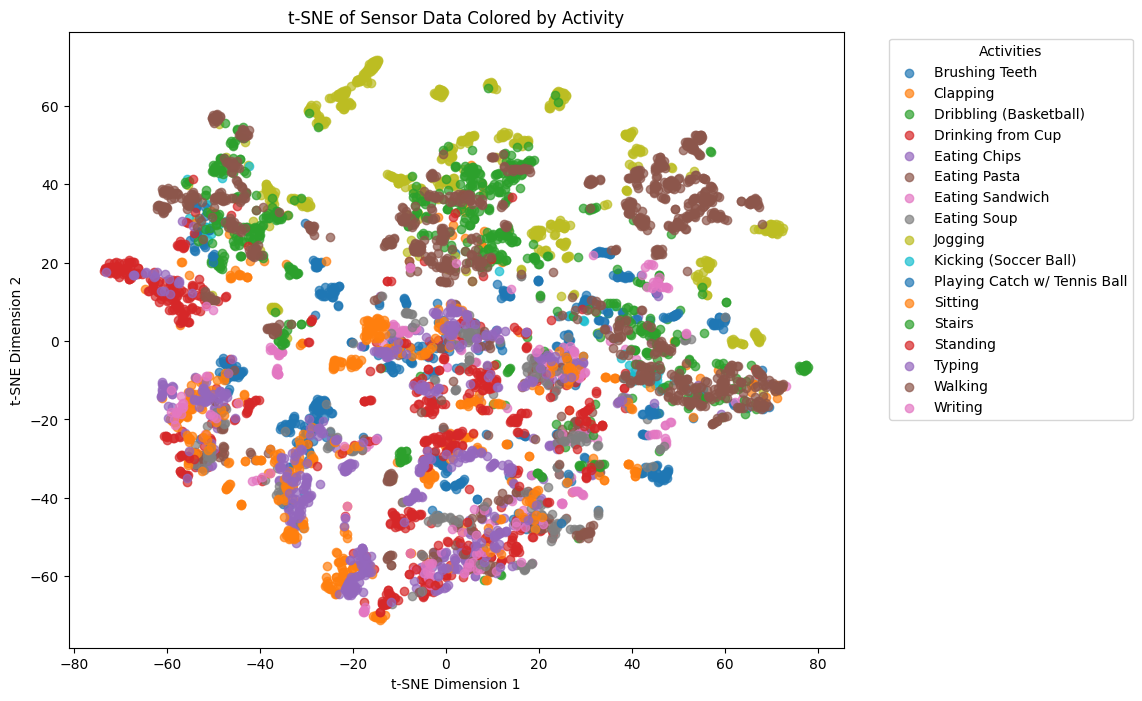

In [7]:
# Do a tSNE of the data and display it colored by activity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
features = data_activity.drop(columns=['ACTIVITY']).values
tsne_result = tsne.fit_transform(features)
categories = data_activity['ACTIVITY'].astype('category').cat.categories
codes = data_activity['ACTIVITY'].astype('category').cat.codes

colors = plt.cm.tab10.colors  # Get a list of colors from the tab10 colormap

plt.figure(figsize=(10, 8))
for i, activity in enumerate(categories.unique()):
    idx = codes == i
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], 
                color=colors[i % len(colors)], label=activity, alpha=0.7)

plt.legend(title="Activities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('t-SNE of Sensor Data Colored by Activity')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [8]:
X_full, y_full = data_activity.drop(columns=['ACTIVITY']), data_activity['ACTIVITY']

X_full.shape, y_full.shape   

((5455, 182), (5455,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

                              precision    recall  f1-score   support

              Brushing Teeth       0.87      0.93      0.90        91
                    Clapping       1.00      1.00      1.00         4
      Dribbling (Basketball)       0.89      0.57      0.70        14
           Drinking from Cup       0.79      0.94      0.86        32
                Eating Chips       0.80      0.85      0.82        39
                Eating Pasta       0.71      0.71      0.71        31
             Eating Sandwich       0.80      0.57      0.67        28
                 Eating Soup       0.86      0.79      0.83        48
                     Jogging       0.94      0.96      0.95       124
       Kicking (Soccer Ball)       1.00      0.17      0.29        12
Playing Catch w/ Tennis Ball       0.86      0.50      0.63        12
                     Sitting       0.90      0.85      0.87       110
                      Stairs       0.83      0.89      0.86       113
                   

<Axes: >

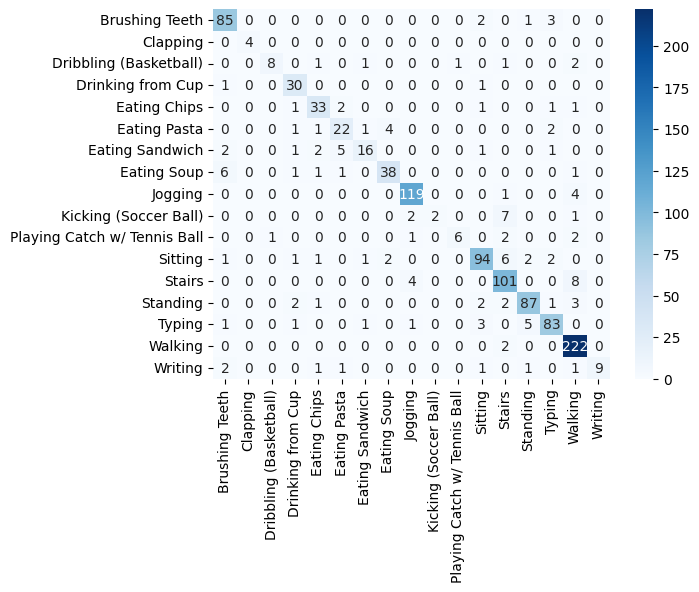

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)

heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)

                              precision    recall  f1-score   support

              Brushing Teeth       0.83      0.90      0.86        91
                    Clapping       0.50      0.25      0.33         4
      Dribbling (Basketball)       0.56      0.36      0.43        14
           Drinking from Cup       0.84      0.66      0.74        32
                Eating Chips       0.88      0.74      0.81        39
                Eating Pasta       0.71      0.71      0.71        31
             Eating Sandwich       0.57      0.57      0.57        28
                 Eating Soup       0.82      0.75      0.78        48
                     Jogging       0.94      0.96      0.95       124
       Kicking (Soccer Ball)       0.60      0.50      0.55        12
Playing Catch w/ Tennis Ball       0.64      0.58      0.61        12
                     Sitting       0.75      0.77      0.76       110
                      Stairs       0.77      0.82      0.79       113
                   

<Axes: >

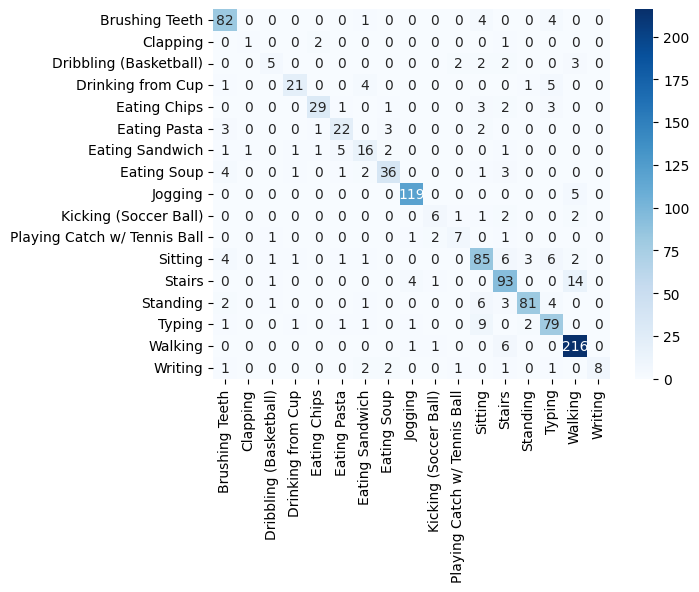

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap

clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, subsample=0.8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)

                              precision    recall  f1-score   support

              Brushing Teeth       0.58      0.57      0.58        91
                    Clapping       0.00      0.00      0.00         4
      Dribbling (Basketball)       1.00      0.29      0.44        14
           Drinking from Cup       0.00      0.00      0.00        32
                Eating Chips       0.00      0.00      0.00        39
                Eating Pasta       0.00      0.00      0.00        31
             Eating Sandwich       1.00      0.04      0.07        28
                 Eating Soup       0.75      0.12      0.21        48
                     Jogging       0.97      0.83      0.90       124
       Kicking (Soccer Ball)       0.00      0.00      0.00        12
Playing Catch w/ Tennis Ball       1.00      0.08      0.15        12
                     Sitting       0.28      0.67      0.39       110
                      Stairs       0.41      0.06      0.11       113
                   

/home/shantanurahman/Documents/Personal/har-iot/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shantanurahman/Documents/Personal/har-iot/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shantanurahman/Documents/Personal/har-iot/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

<Axes: >

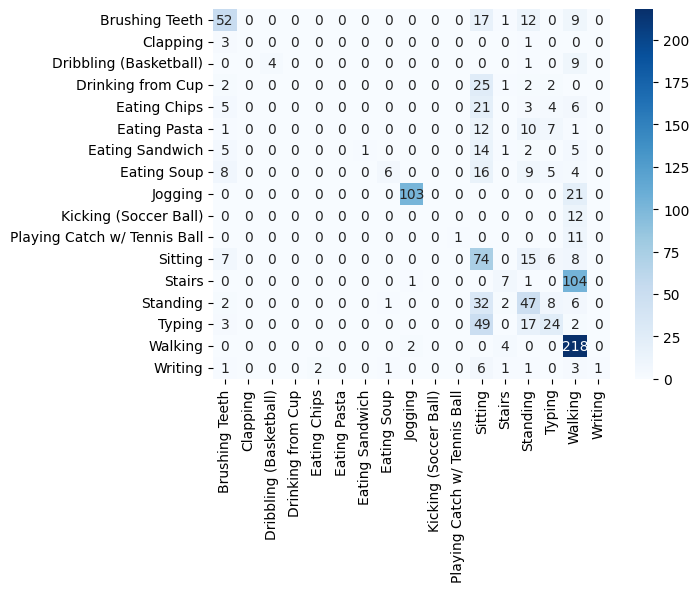

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap

clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)

### Cross Device (Watch to Mobile)

In [13]:
df_watch = []

watch_files = sorted(glob.glob('../dataset/watch*/accel/*.arff'))

for file in watch_files:
    filename = os.path.basename(file)
    _, subject_id, _, device = filename.replace('.arff', '').split('_')
    df_accel = load_single_data_file(subject_id, device, 'accel')
    df_gyro = load_single_data_file(subject_id, device, 'gyro')


    max_matching_prefix = df_accel[common_columns].eq(df_gyro[common_columns]).all(axis=1).idxmin()
    common_df = df_accel[common_columns]
    common_df = common_df.iloc[:max_matching_prefix]

    df_accel = df_accel.iloc[:max_matching_prefix]
    df_gyro = df_gyro.iloc[:max_matching_prefix]

    df = pd.concat(
        [
            common_df,
            df_accel.drop(columns=common_columns),
            df_gyro.drop(columns=common_columns)
        ],
        axis=1
    )

    df_watch.append(df)

df_watch = pd.concat(df_watch, axis=0)

df_watch['ACTIVITY'] = df_watch['ACTIVITY'].apply(from_activity_to_label)
df_watch_activity = df_watch.drop(columns=['class']) # Subject is not important for classification

df_watch_activity.shape

(1498, 183)

In [14]:
df_watch_activity.head()

ACTIVITY  ACCEL_X0  ACCEL_X1  ACCEL_X2  ACCEL_X3  ACCEL_X4  ACCEL_X5  \
0  Walking      0.73     0.035     0.015     0.045     0.075     0.065   
1  Walking      1.00     0.000     0.000     0.000     0.000     0.000   
2  Walking      1.00     0.000     0.000     0.000     0.000     0.000   
3  Walking      1.00     0.000     0.000     0.000     0.000     0.000   
4  Walking      1.00     0.000     0.000     0.000     0.000     0.000   

   ACCEL_X6  ACCEL_X7  ACCEL_X8  ...  GYRO_ZMFCC10  GYRO_ZMFCC11  \
0      0.03       0.0       0.0  ...      0.436542      0.431460   
1      0.00       0.0       0.0  ...      0.454184      0.448896   
2      0.00       0.0       0.0  ...      0.393170      0.388593   
3      0.00       0.0       0.0  ...      0.433211      0.428167   
4      0.00       0.0       0.0  ...      0.397829      0.393198   

   GYRO_ZMFCC12  GYRO_XYCOS  GYRO_XZCOS  GYRO_YZCOS  GYRO_XYCOR  GYRO_XZCOR  \
0      0.425915    0.067125   -0.095405   -0.326987    0.068851   -0.090242   
1      0.443128    0.073839   -0.054304    0.638395    0.073380   -0.052824   
2      0.383600   -0.037012   -0.111601    0.728247   -0.042176   -0.109756   
3      0.422666   -0.103651    0.022456    0.358601   -0.102930    0.023107   
4      0.388145    0.061627    0.214718    0.655741    0.066276    0.213736   

   GYRO_YZCOR  GYRO_RESULTANT  
0   -0.328662         3.09957  
1    0.638938         3.60246  
2    0.743878         3.73240  
3    0.358267         3.54534  
4    0.657831         3.36971  

[5 rows x 183 columns]

In [15]:
df_watch_activity['ACTIVITY'].value_counts()

ACTIVITY
Walking                         331
Jogging                         108
Stairs                          108
Sitting                         107
Standing                         90
Typing                           90
Brushing Teeth                   90
Eating Soup                      90
Eating Chips                     89
Eating Pasta                     72
Drinking from Cup                72
Eating Sandwich                  58
Writing                          57
Dribbling (Basketball)           46
Kicking (Soccer Ball)            36
Playing Catch w/ Tennis Ball     36
Clapping                         18
Name: count, dtype: int64

In [16]:
df_phone = []

phone_files = sorted(glob.glob('../dataset/phone*/accel/*.arff'))

for file in phone_files:
    filename = os.path.basename(file)
    _, subject_id, _, device = filename.replace('.arff', '').split('_')
    df_accel = load_single_data_file(subject_id, device, 'accel')
    df_gyro = load_single_data_file(subject_id, device, 'gyro')


    max_matching_prefix = df_accel[common_columns].eq(df_gyro[common_columns]).all(axis=1).idxmin()
    common_df = df_accel[common_columns]
    common_df = common_df.iloc[:max_matching_prefix]

    df_accel = df_accel.iloc[:max_matching_prefix]
    df_gyro = df_gyro.iloc[:max_matching_prefix]

    df = pd.concat(
        [
            common_df,
            df_accel.drop(columns=common_columns),
            df_gyro.drop(columns=common_columns)
        ],
        axis=1
    )

    df_phone.append(df)

df_phone = pd.concat(df_phone, axis=0)

df_phone['ACTIVITY'] = df_phone['ACTIVITY'].apply(from_activity_to_label)
df_phone_activity = df_phone.drop(columns=['class']) # Subject is not important for classification

df_phone_activity.shape

(3957, 183)

In [17]:
X_full_watch, y_full_watch = df_watch_activity.drop(columns=['ACTIVITY']), df_watch_activity['ACTIVITY']
X_full_phone, y_full_phone = df_phone_activity.drop(columns=['ACTIVITY']), df_phone_activity['ACTIVITY']

X_full_watch.shape, y_full_watch.shape, X_full_phone.shape, y_full_phone.shape

((1498, 182), (1498,), (3957, 182), (3957,))

In [18]:
X_train_watch, X_test_watch, y_train_watch, y_test_watch = train_test_split(X_full_watch, y_full_watch, test_size=0.2, random_state=42, stratify=y_full_watch)
X_train_phone, X_test_phone, y_train_phone, y_test_phone = train_test_split(X_full_phone, y_full_phone, test_size=0.2, random_state=42, stratify=y_full_phone)

print(X_train_watch.shape, y_train_watch.shape)
print(X_test_watch.shape, y_test_watch.shape)

print("---------------")

print(X_train_phone.shape, y_train_phone.shape)
print(X_test_phone.shape, y_test_phone.shape)

(1198, 182) (1198,)
(300, 182) (300,)
---------------
(3165, 182) (3165,)
(792, 182) (792,)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_watch, y_train_watch)

RandomForestClassifier(random_state=42)

                              precision    recall  f1-score   support

              Brushing Teeth       0.90      1.00      0.95        18
                    Clapping       1.00      0.50      0.67         4
      Dribbling (Basketball)       0.78      0.78      0.78         9
           Drinking from Cup       1.00      0.93      0.96        14
                Eating Chips       0.65      0.83      0.73        18
                Eating Pasta       0.63      0.86      0.73        14
             Eating Sandwich       0.80      0.67      0.73        12
                 Eating Soup       1.00      1.00      1.00        18
                     Jogging       1.00      1.00      1.00        22
       Kicking (Soccer Ball)       1.00      0.57      0.73         7
Playing Catch w/ Tennis Ball       1.00      0.86      0.92         7
                     Sitting       1.00      0.73      0.84        22
                      Stairs       0.82      0.82      0.82        22
                   

<Axes: >

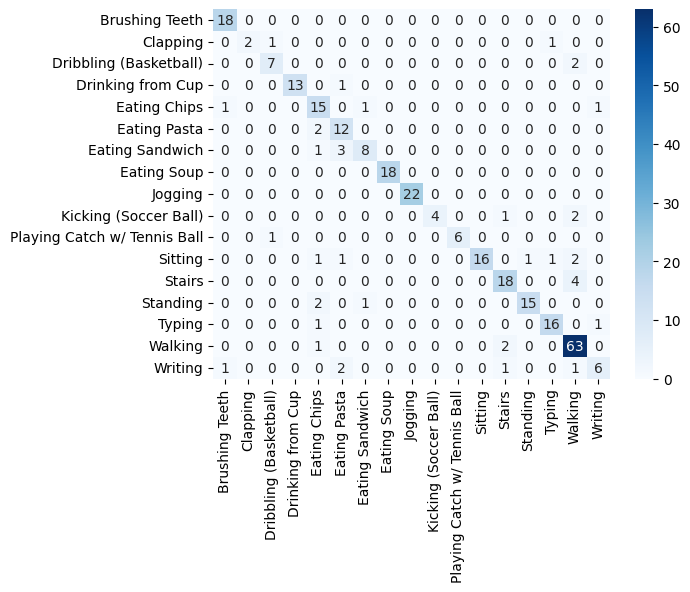

In [20]:
y_pred_watch = clf.predict(X_test_watch)
print(classification_report(y_test_watch, y_pred_watch))
conf_mat = confusion_matrix(y_test_watch, y_pred_watch)
heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)

                              precision    recall  f1-score   support

              Brushing Teeth       0.43      0.08      0.14        74
                    Clapping       0.00      0.00      0.00         0
      Dribbling (Basketball)       0.00      0.00      0.00         5
           Drinking from Cup       0.07      0.12      0.09        17
                Eating Chips       0.07      0.05      0.06        21
                Eating Pasta       0.11      0.06      0.08        17
             Eating Sandwich       0.00      0.00      0.00        17
                 Eating Soup       0.08      0.10      0.09        30
                     Jogging       0.97      0.69      0.80       102
       Kicking (Soccer Ball)       0.00      0.00      0.00         5
Playing Catch w/ Tennis Ball       0.00      0.00      0.00         4
                     Sitting       0.34      0.47      0.40        89
                      Stairs       0.60      0.10      0.17        92
                   

/home/shantanurahman/Documents/Personal/har-iot/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shantanurahman/Documents/Personal/har-iot/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shantanurahman/Documents/Personal/har-iot/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

<Axes: >

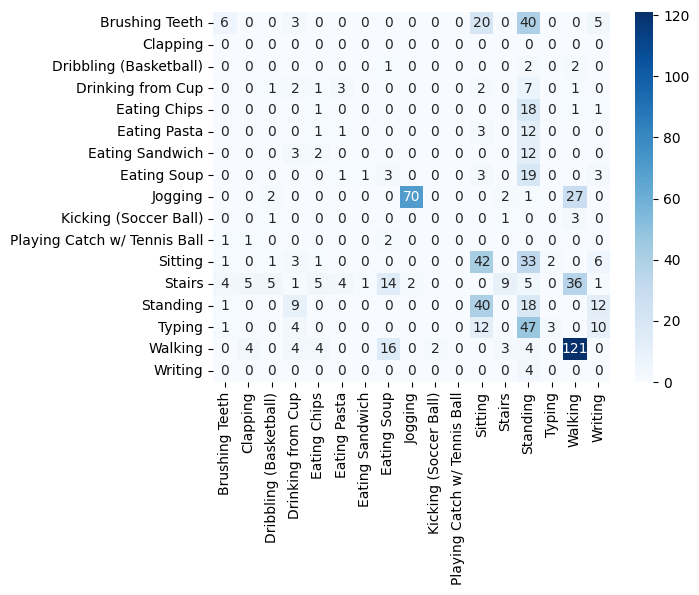

In [21]:
y_pred_phone = clf.predict(X_test_phone)
print(classification_report(y_test_phone, y_pred_phone))
conf_mat = confusion_matrix(y_test_phone, y_pred_phone)
heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)

In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_phone, y_train_phone)

RandomForestClassifier(random_state=42)

                              precision    recall  f1-score   support

              Brushing Teeth       0.86      0.93      0.90        74
      Dribbling (Basketball)       1.00      0.60      0.75         5
           Drinking from Cup       0.80      0.71      0.75        17
                Eating Chips       0.81      0.81      0.81        21
                Eating Pasta       0.79      0.65      0.71        17
             Eating Sandwich       0.93      0.82      0.88        17
                 Eating Soup       0.87      0.87      0.87        30
                     Jogging       0.93      0.95      0.94       102
       Kicking (Soccer Ball)       1.00      0.60      0.75         5
Playing Catch w/ Tennis Ball       0.75      0.75      0.75         4
                     Sitting       0.95      0.90      0.92        89
                      Stairs       0.92      0.87      0.89        92
                    Standing       0.93      0.96      0.94        80
                   

<Axes: >

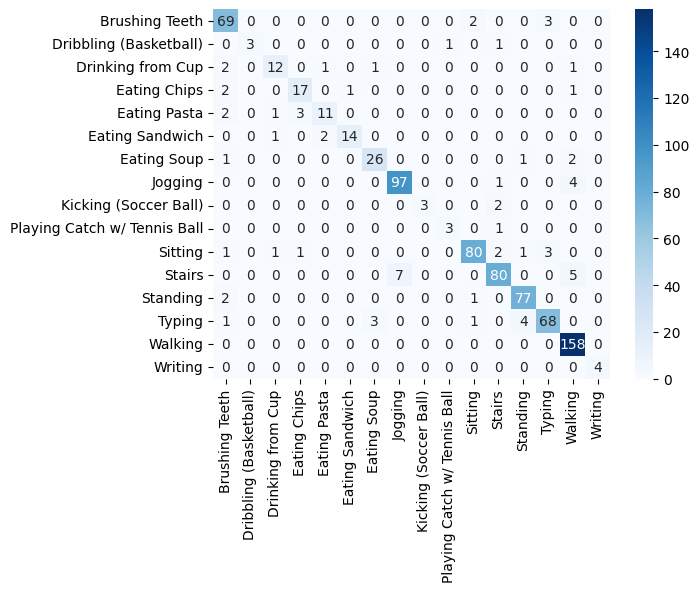

In [23]:
y_pred_phone = clf.predict(X_test_phone)
print(classification_report(y_test_phone, y_pred_phone))
conf_mat = confusion_matrix(y_test_phone, y_pred_phone)
heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)

                              precision    recall  f1-score   support

              Brushing Teeth       0.47      0.50      0.49        18
                    Clapping       0.00      0.00      0.00         4
      Dribbling (Basketball)       0.00      0.00      0.00         9
           Drinking from Cup       0.50      0.21      0.30        14
                Eating Chips       0.33      0.06      0.10        18
                Eating Pasta       0.31      0.29      0.30        14
             Eating Sandwich       0.00      0.00      0.00        12
                 Eating Soup       0.32      0.61      0.42        18
                     Jogging       0.69      1.00      0.81        22
       Kicking (Soccer Ball)       0.00      0.00      0.00         7
Playing Catch w/ Tennis Ball       0.00      0.00      0.00         7
                     Sitting       0.27      0.45      0.34        22
                      Stairs       0.14      0.09      0.11        22
                   

/home/shantanurahman/Documents/Personal/har-iot/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shantanurahman/Documents/Personal/har-iot/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shantanurahman/Documents/Personal/har-iot/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

<Axes: >

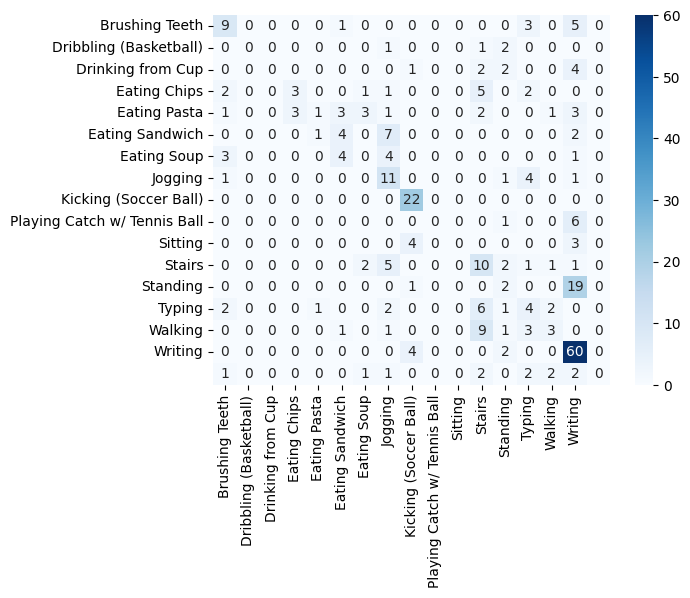

In [24]:
y_pred_watch = clf.predict(X_test_watch)
print(classification_report(y_test_watch, y_pred_watch))
conf_mat = confusion_matrix(y_test_watch, y_pred_watch)
heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)

#### Cross device method doesn't work

In [25]:
def load_single_data_file(subject_id, device, sensor):
    data, _ = arff.loadarff(f'../dataset/{device}_arff/{sensor}/data_{subject_id}_{sensor}_{device}.arff')
    df = pd.DataFrame(data)
    df.columns = df.columns.str.strip('"')
    df.columns = map(lambda column_name: device.upper() + "_" + sensor.upper() + "_" + column_name if column_name[0] in ["X", "Y", "Z", "R"] else column_name, df.columns)
    df['ACTIVITY'] = df['ACTIVITY'].str.decode('utf-8')
    df['class'] = df['class'].str.decode('utf-8')
    return df

df = load_single_data_file('1600', 'watch', 'gyro')
df.head()

ACTIVITY  WATCH_GYRO_X0  WATCH_GYRO_X1  WATCH_GYRO_X2  WATCH_GYRO_X3  \
0        A          0.075          0.415          0.445          0.060   
1        A          0.085          0.335          0.490          0.080   
2        A          0.055          0.490          0.355          0.095   
3        A          0.055          0.500          0.340          0.085   
4        A          0.025          0.475          0.455          0.045   

   WATCH_GYRO_X4  WATCH_GYRO_X5  WATCH_GYRO_X6  WATCH_GYRO_X7  WATCH_GYRO_X8  \
0          0.005          0.000            0.0          0.000            0.0   
1          0.005          0.000            0.0          0.005            0.0   
2          0.000          0.005            0.0          0.000            0.0   
3          0.020          0.000            0.0          0.000            0.0   
4          0.000          0.000            0.0          0.000            0.0   

   ...  WATCH_GYRO_ZMFCC11  WATCH_GYRO_ZMFCC12  WATCH_GYRO_XYCOS  \
0  ...            0.456107            0.450246          0.137651   
1  ...            0.465964            0.459977         -0.047322   
2  ...            0.436792            0.431179          0.276071   
3  ...            0.426576            0.421094          0.282766   
4  ...            0.417362            0.411999          0.330998   

   WATCH_GYRO_XZCOS  WATCH_GYRO_YZCOS  WATCH_GYRO_XYCOR  WATCH_GYRO_XZCOR  \
0          0.235345          0.766546          0.136262          0.235501   
1          0.278694          0.245712         -0.046939          0.278224   
2          0.417038          0.484973          0.276789          0.417461   
3          0.397700          0.660787          0.287947          0.398490   
4          0.404267          0.870224          0.330725          0.404739   

   WATCH_GYRO_YZCOR  WATCH_GYRO_RESULTANT  class  
0          0.766845               4.04589   1600  
1          0.245890               4.02048   1600  
2          0.484790               3.78650   1600  
3          0.662386               3.77595   1600  
4          0.873363               3.54575   1600  

[5 rows x 93 columns]

In [26]:
# Use data from both phone and watch to train the model

data = []
filelist = glob.glob('../dataset/phone*/accel/*.arff')

for file in filelist:
    filename = os.path.basename(file)
    _, subject_id, _, device = filename.replace('.arff', '').split('_')
    df_accel_phone = load_single_data_file(subject_id, 'phone', 'accel')
    df_gyro_phone = load_single_data_file(subject_id, 'phone', 'gyro')
    df_accel_watch = load_single_data_file(subject_id, 'watch', 'accel')
    df_gyro_watch = load_single_data_file(subject_id, 'watch', 'gyro')

    max_matching_prefix_phone = df_accel_phone[common_columns].eq(df_gyro_phone[common_columns]).all(axis=1).idxmin()
    max_matching_prefix_watch = df_accel_watch[common_columns].eq(df_gyro_watch[common_columns]).all(axis=1).idxmin()
    max_matching_prefix = min(max_matching_prefix_phone, max_matching_prefix_watch)

    common_df = df_accel_phone[common_columns]
    common_df = common_df.iloc[:max_matching_prefix]

    df_accel_phone = df_accel_phone.iloc[:max_matching_prefix]
    df_gyro_phone = df_gyro_phone.iloc[:max_matching_prefix]
    df_accel_watch = df_accel_watch.iloc[:max_matching_prefix]
    df_gyro_watch = df_gyro_watch.iloc[:max_matching_prefix]

    assert(df_accel_phone[common_columns].equals(df_gyro_phone[common_columns]))

    df = pd.concat(
        [
            common_df,
            df_accel_phone.drop(columns=common_columns),
            df_gyro_phone.drop(columns=common_columns),
            df_accel_watch.drop(columns=common_columns),
            df_gyro_watch.drop(columns=common_columns)
        ],
        axis=1
    )

    data.append(df)

data = pd.concat(data, axis=0)
data['ACTIVITY'] = data['ACTIVITY'].apply(from_activity_to_label)
data.shape

(414, 366)

In [27]:
data['ACTIVITY'].value_counts()

ACTIVITY
Walking           248
Jogging            41
Stairs             36
Sitting            36
Standing           18
Typing             18
Brushing Teeth     17
Name: count, dtype: int64

In [28]:
print('\n'.join(map(str, data.columns)))

ACTIVITY
class
PHONE_ACCEL_X0
PHONE_ACCEL_X1
PHONE_ACCEL_X2
PHONE_ACCEL_X3
PHONE_ACCEL_X4
PHONE_ACCEL_X5
PHONE_ACCEL_X6
PHONE_ACCEL_X7
PHONE_ACCEL_X8
PHONE_ACCEL_X9
PHONE_ACCEL_Y0
PHONE_ACCEL_Y1
PHONE_ACCEL_Y2
PHONE_ACCEL_Y3
PHONE_ACCEL_Y4
PHONE_ACCEL_Y5
PHONE_ACCEL_Y6
PHONE_ACCEL_Y7
PHONE_ACCEL_Y8
PHONE_ACCEL_Y9
PHONE_ACCEL_Z0
PHONE_ACCEL_Z1
PHONE_ACCEL_Z2
PHONE_ACCEL_Z3
PHONE_ACCEL_Z4
PHONE_ACCEL_Z5
PHONE_ACCEL_Z6
PHONE_ACCEL_Z7
PHONE_ACCEL_Z8
PHONE_ACCEL_Z9
PHONE_ACCEL_XAVG
PHONE_ACCEL_YAVG
PHONE_ACCEL_ZAVG
PHONE_ACCEL_XPEAK
PHONE_ACCEL_YPEAK
PHONE_ACCEL_ZPEAK
PHONE_ACCEL_XABSOLDEV
PHONE_ACCEL_YABSOLDEV
PHONE_ACCEL_ZABSOLDEV
PHONE_ACCEL_XSTANDDEV
PHONE_ACCEL_YSTANDDEV
PHONE_ACCEL_ZSTANDDEV
PHONE_ACCEL_XVAR
PHONE_ACCEL_YVAR
PHONE_ACCEL_ZVAR
PHONE_ACCEL_XMFCC0
PHONE_ACCEL_XMFCC1
PHONE_ACCEL_XMFCC2
PHONE_ACCEL_XMFCC3
PHONE_ACCEL_XMFCC4
PHONE_ACCEL_XMFCC5
PHONE_ACCEL_XMFCC6
PHONE_ACCEL_XMFCC7
PHONE_ACCEL_XMFCC8
PHONE_ACCEL_XMFCC9
PHONE_ACCEL_XMFCC10
PHONE_ACCEL_XMFCC11
PHONE_ACCEL_XMFCC

In [29]:
data_activity = data.drop(columns=['class']) # Subject is not important for classification

In [30]:
X_full, y_full = data_activity.drop(columns=['ACTIVITY']), data['ACTIVITY']

X_full.shape, y_full.shape

((414, 364), (414,))

[]

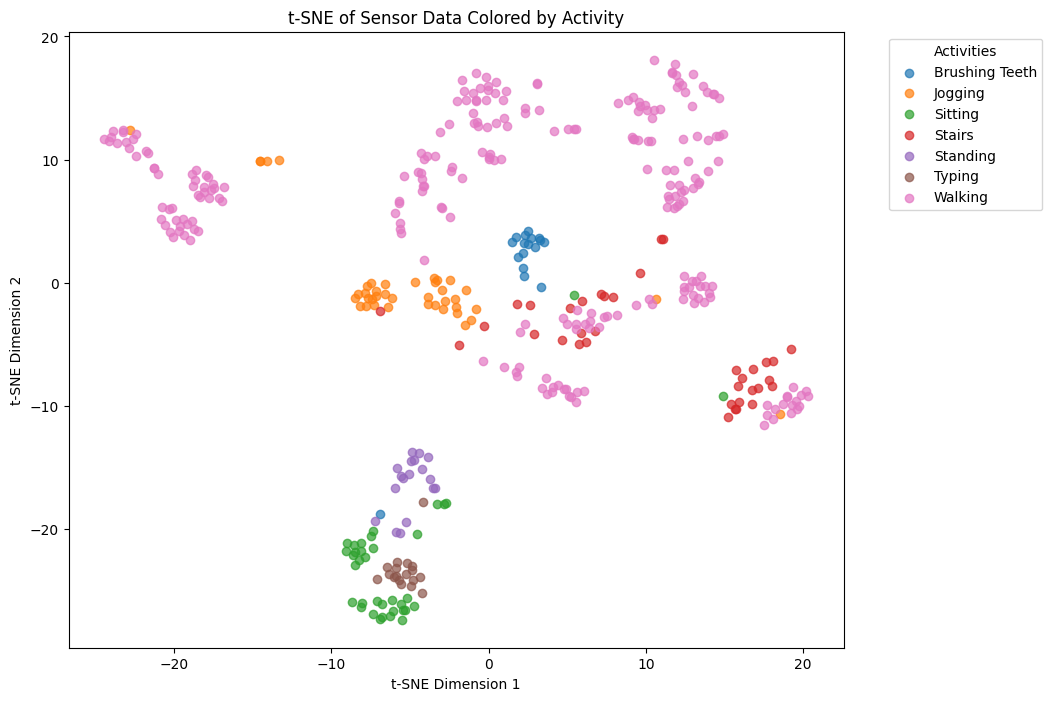

In [31]:
tsne = TSNE(n_components=2, random_state=42)
features = data_activity.drop(columns=['ACTIVITY']).values
tsne_result = tsne.fit_transform(features)

color = plt.cm.tab10.colors  # Get a list of colors from the tab10 colormap
categories = data_activity['ACTIVITY'].astype('category').cat.categories
codes = data_activity['ACTIVITY'].astype('category').cat.codes

plt.figure(figsize=(10, 8))

for i, activity in enumerate(categories.unique()):
    idx = codes == i
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], 
                color=colors[i % len(colors)], label=activity, alpha=0.7)
    
plt.legend(title="Activities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('t-SNE of Sensor Data Colored by Activity')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.plot()

#### Not enough data if we account for both phone and watch. Best course of action is to separately train model for each of the device and sensors

Device: phone, Sensor: accel
(23074, 91) (23074,)


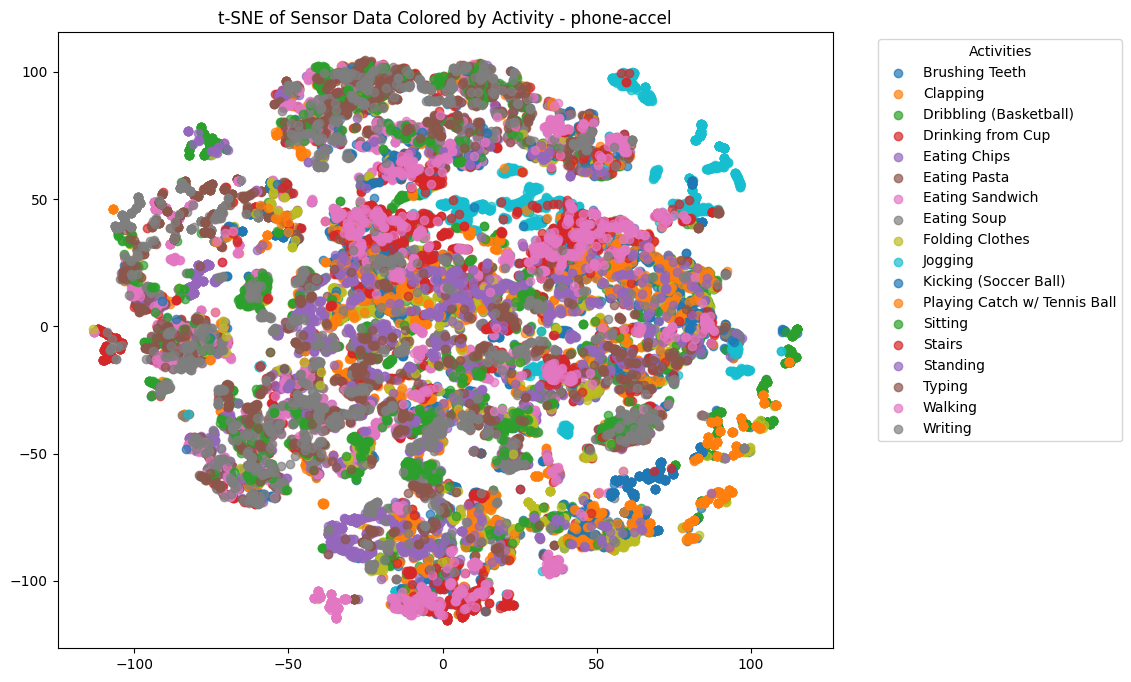

Training RandomForestClassifier...
                              precision    recall  f1-score   support

              Brushing Teeth       0.92      0.84      0.88       257
                    Clapping       0.88      0.92      0.90       254
      Dribbling (Basketball)       0.81      0.86      0.83       283
           Drinking from Cup       0.84      0.85      0.85       262
                Eating Chips       0.83      0.81      0.82       247
                Eating Pasta       0.87      0.79      0.83       236
             Eating Sandwich       0.84      0.83      0.84       248
                 Eating Soup       0.85      0.88      0.87       250
             Folding Clothes       0.77      0.86      0.81       252
                     Jogging       0.95      0.95      0.95       263
       Kicking (Soccer Ball)       0.78      0.92      0.85       293
Playing Catch w/ Tennis Ball       0.84      0.80      0.82       286
                     Sitting       0.93      0.87     

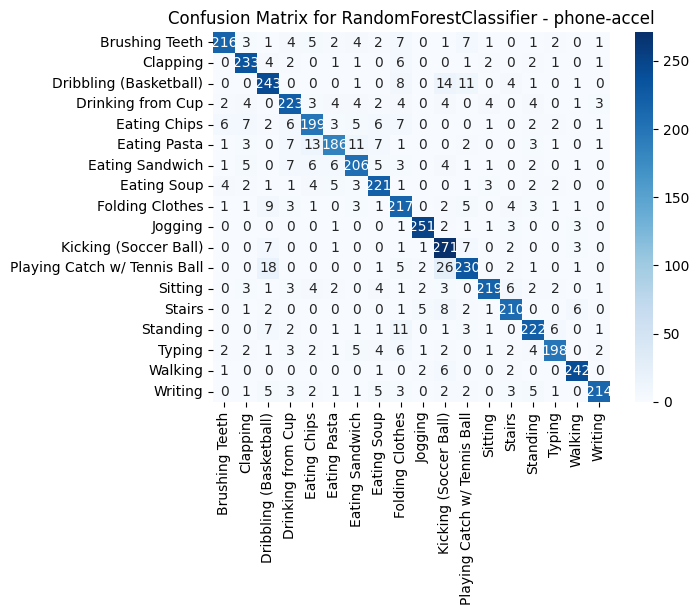

Device: phone, Sensor: gyro
(17281, 91) (17281,)


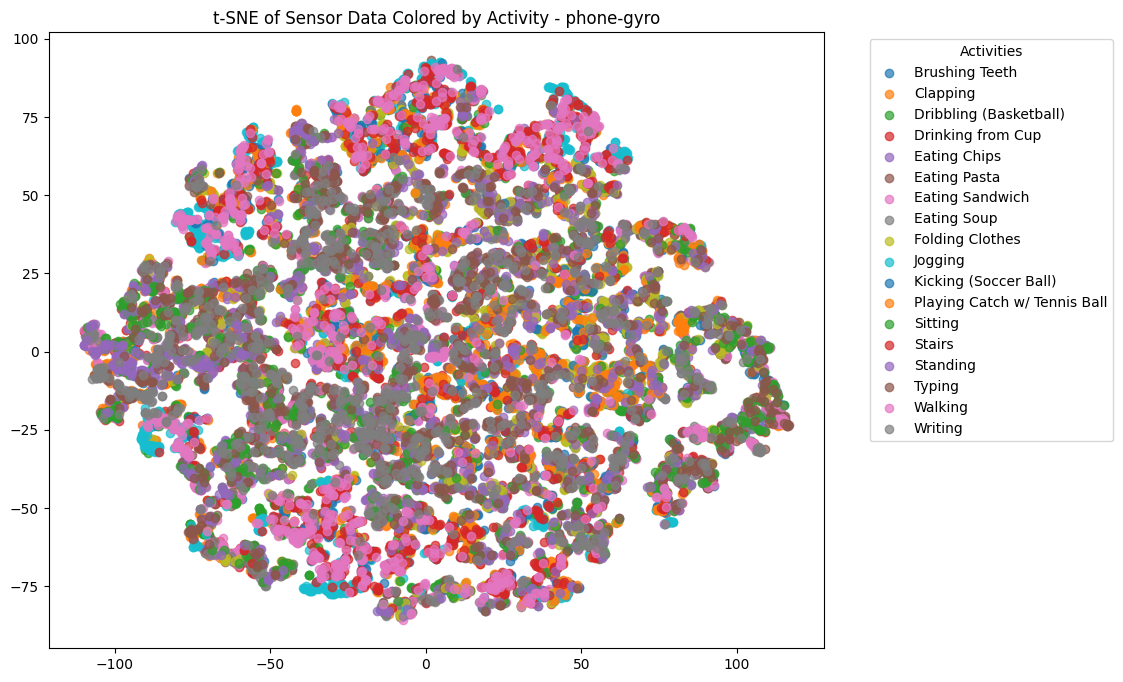

Training RandomForestClassifier...
                              precision    recall  f1-score   support

              Brushing Teeth       0.57      0.54      0.56       191
                    Clapping       0.54      0.55      0.54       196
      Dribbling (Basketball)       0.53      0.53      0.53       194
           Drinking from Cup       0.36      0.27      0.31       195
                Eating Chips       0.40      0.35      0.37       189
                Eating Pasta       0.36      0.41      0.38       192
             Eating Sandwich       0.47      0.38      0.42       190
                 Eating Soup       0.42      0.37      0.39       195
             Folding Clothes       0.54      0.71      0.61       194
                     Jogging       0.89      0.94      0.92       193
       Kicking (Soccer Ball)       0.63      0.76      0.69       194
Playing Catch w/ Tennis Ball       0.62      0.62      0.62       189
                     Sitting       0.58      0.48     

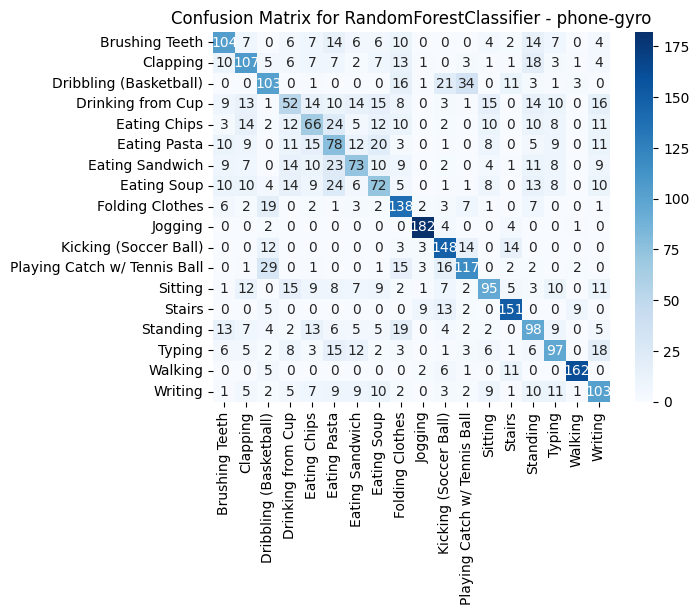

Device: watch, Sensor: accel
(18211, 91) (18211,)


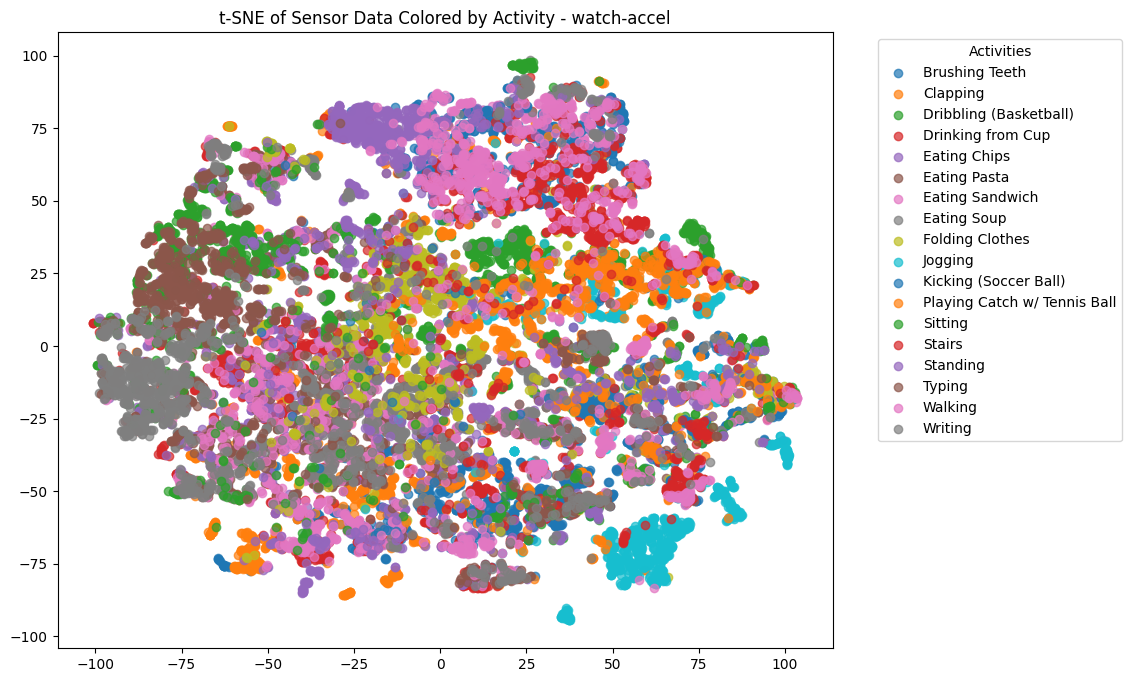

Training RandomForestClassifier...
                              precision    recall  f1-score   support

              Brushing Teeth       0.89      0.90      0.89       201
                    Clapping       0.94      0.95      0.95       202
      Dribbling (Basketball)       0.93      0.91      0.92       205
           Drinking from Cup       0.82      0.81      0.82       209
                Eating Chips       0.62      0.63      0.63       202
                Eating Pasta       0.67      0.80      0.73       196
             Eating Sandwich       0.69      0.51      0.58       196
                 Eating Soup       0.80      0.83      0.81       202
             Folding Clothes       0.74      0.89      0.81       204
                     Jogging       0.99      0.95      0.97       199
       Kicking (Soccer Ball)       0.83      0.82      0.83       202
Playing Catch w/ Tennis Ball       0.88      0.89      0.88       203
                     Sitting       0.84      0.76     

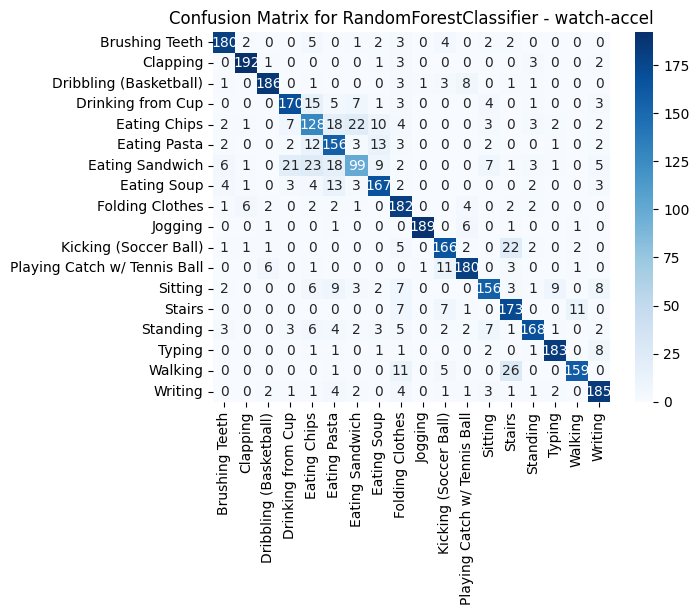

Device: watch, Sensor: gyro
(16533, 91) (16533,)


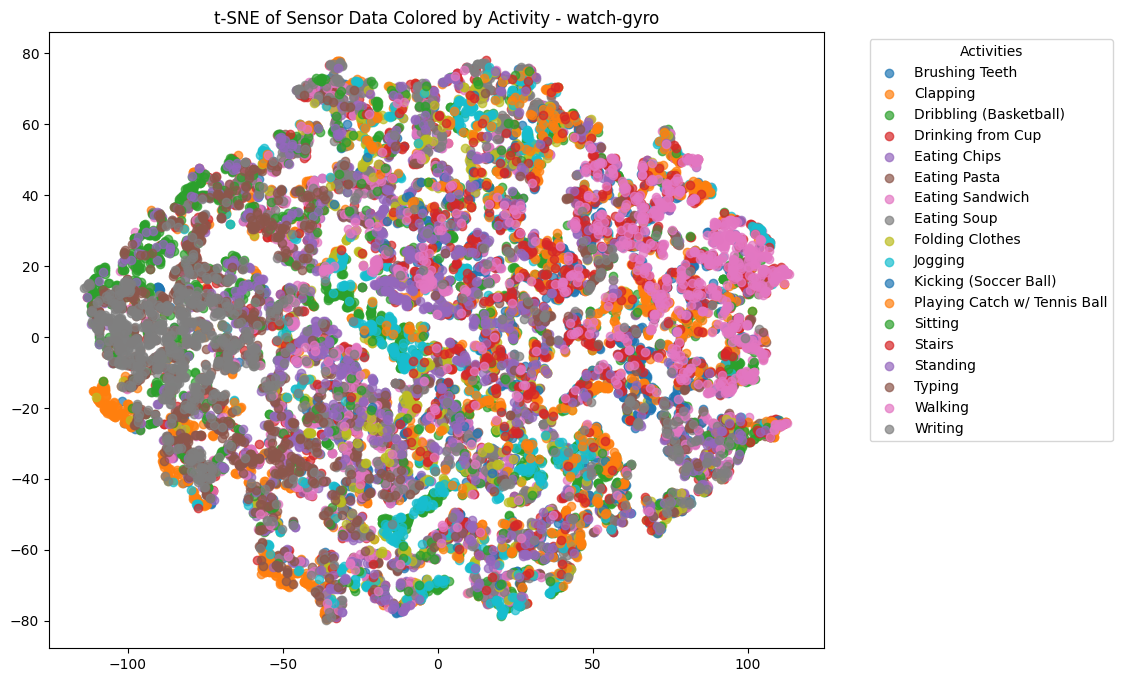

Training RandomForestClassifier...
                              precision    recall  f1-score   support

              Brushing Teeth       0.65      0.78      0.71       184
                    Clapping       0.89      0.92      0.91       183
      Dribbling (Basketball)       0.98      0.85      0.91       188
           Drinking from Cup       0.58      0.58      0.58       191
                Eating Chips       0.47      0.45      0.46       184
                Eating Pasta       0.50      0.58      0.54       182
             Eating Sandwich       0.47      0.30      0.36       183
                 Eating Soup       0.61      0.56      0.58       180
             Folding Clothes       0.67      0.83      0.74       187
                     Jogging       0.92      0.97      0.94       180
       Kicking (Soccer Ball)       0.71      0.74      0.73       184
Playing Catch w/ Tennis Ball       0.84      0.88      0.86       180
                     Sitting       0.71      0.57     

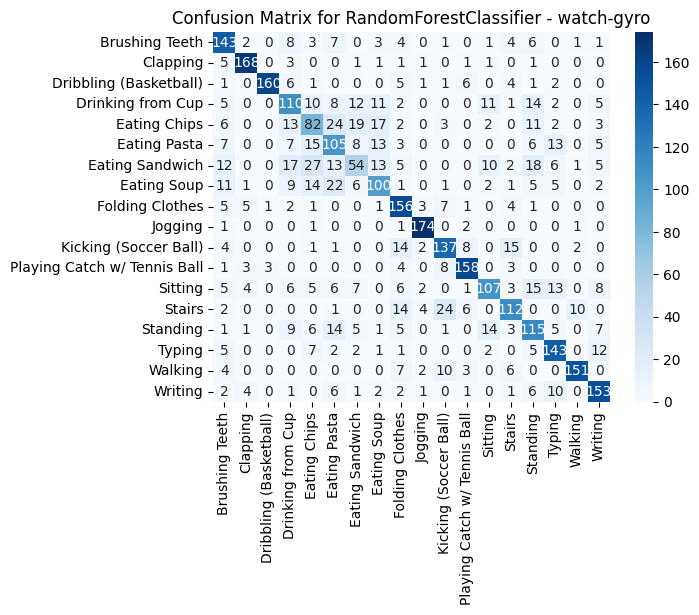

In [33]:
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

def pipeline(data, classifiers, name="Unknown"):
    X_full, y_full = data_activity.drop(columns=['ACTIVITY']), data['ACTIVITY']
    print(X_full.shape, y_full.shape)

    # Plot tSNE
    tsne = TSNE(n_components=2, random_state=42)
    features = X_full.values
    tsne_results = tsne.fit_transform(features)
    categories = data_activity['ACTIVITY'].astype('category').cat.categories
    codes = data_activity['ACTIVITY'].astype('category').cat.codes

    colors = plt.cm.tab10.colors  # Get a list of colors from the tab10 colormap
    plt.figure(figsize=(10, 8))
    for i, activity in enumerate(categories.unique()):
        idx = codes == i
        plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1], 
                    color=colors[i % len(colors)], label=activity, alpha=0.7)
    plt.legend(title="Activities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f't-SNE of Sensor Data Colored by Activity - {name}')
    plt.show()

    X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

    for clf in classifiers:
        print(f"Training {clf.__class__.__name__}...")
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        conf_mat = confusion_matrix(y_test, y_pred)

        plt.title(f'Confusion Matrix for {clf.__class__.__name__} - {name}')
        heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
        plt.show()

possible_devices = ['phone', 'watch']
possible_sensors = ['accel', 'gyro']

for device, sensor in product(possible_devices, possible_sensors):
    print(f"Device: {device}, Sensor: {sensor}")
    filelist = glob.glob(f'../dataset/{device}*/{sensor}/*.arff')
    data = []

    for file in filelist:
        filename = os.path.basename(file)
        _, subject_id, _, _ = filename.replace('.arff', '').split('_')
        df = load_single_data_file(subject_id, device, sensor)
        data.append(df)

    data = pd.concat(data, axis=0)
    data['ACTIVITY'] = data['ACTIVITY'].apply(from_activity_to_label)
    data_activity = data.drop(columns=['class']) # Subject is not important for classification

    pipeline(
        data_activity,
        [
            RandomForestClassifier(n_estimators=100, random_state=42),
            # MLPClassifier(hidden_layer_sizes=(1024, 1024), activation='logistic', max_iter=300, random_state=42)
            # GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, subsample=0.8, random_state=42),
            # SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
        ],
        name=f"{device}-{sensor}"
    )